In [1]:
from ODE_parser import ODE_parser
from approximation import ODE_approx
import sympy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x0 = 0.3
v0 = 0.9
init_vals = [x0, v0]

M = 10
L = 10

ODE = " { x' = v, v' = 9.8 & t <= 1 }"
ODE_actual = "[x0 + v0*t + 1/2 * 9.8 * t**2, v0 + 9.8*t]"

In [3]:
ODE_actual_fn = sympy.lambdify([sympy.symbols("x0 v0"), sympy.symbols("t")], sympy.sympify(ODE_actual))

res, vars, fn, T = ODE_parser(ODE)
if not res:
    print("Parsing failed")
    raise Exception("Parsing Failed")
print("ode variables: ", vars)
print("maximum time: ", T)

ode variables:  [x, v]
maximum time:  1.0


In [4]:
fn(0.1, (1, 0))

array([[0. ],
       [9.8]])

In [5]:
ODE_approx_fn = ODE_approx(fn, len(vars), M, L, T, h=0.1)

In [6]:
print(ODE_actual_fn(init_vals, 0.1))
print(ODE_approx_fn(init_vals, 0.1))

[0.439, 1.8800000000000001]
[array(0.39), array(1.88)]


0.4900000000000002
8.881784197001252e-15


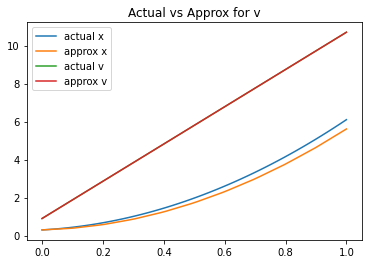

In [7]:
tt = np.linspace(0, T)
for i in range(len(vars)):
    x_actual = [ODE_actual_fn(init_vals, t)[i] for t in tt]
    x_approx = [ODE_approx_fn(init_vals, t)[i] for t in tt]
    plt.plot(tt, x_actual, label="actual "+str(vars[i]))  
    plt.plot(tt, x_approx, label="approx "+str(vars[i]))
    plt.legend()
    plt.title("Actual vs Approx for "+str(vars[i]))
    print(max(abs(np.array(x_actual)-np.array(x_approx))))